In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder



## data wrangling

In [3]:
df=pd.read_csv('Kaggle.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.shape   #14 colums , 110527 rows(patients)

(110527, 14)

In [5]:
#to get the basics info
#no null or missing value 
# and we should flip object to int 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.duplicated().any()

False

In [8]:
(df.isna().sum()/df.shape[0])*100

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

In [9]:
#Edit the "ScheduledDay", and "AppointmentDay" Columns' Datatype to be Datetime:
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [11]:
drop_1=["PatientId","AppointmentID","Scholarship"]
df.drop(drop_1, inplace= True , axis=1)

In [12]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,1,1,0,0,0,No


In [13]:
df.describe(include="all")

<ipython-input-13-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
<ipython-input-13-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,2
top,F,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,No
freq,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,88208
first,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,37.088874,NaN,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,NaN,NaN,NaN,23.110205,NaN,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


## Data cleaning:

In [6]:
df=df.rename(columns={'No-show':'NoShow' })

In [7]:
df['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [8]:
#to visulaize it 
plt.style.use('bmh')

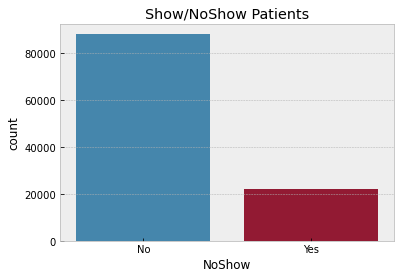

In [9]:
ax=sns.countplot(x=df.NoShow , data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

In [10]:
df[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
df=df.drop([99832])

In [12]:
df[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow


In [ ]:
#so we removed age<0

Questions:

In [ ]:
#Exploratory Data Analysis

In [39]:
#Percentage of patients who went to their appointments represents 79.8%
#Percentage of patients who Don't show up on their appointments represents 20.2%

In [40]:
#can gender effect ?
print('show unique value in Gedner', df.Gender.unique())

show unique value in Gedner ['F' 'M']


In [41]:
df["Gender"].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

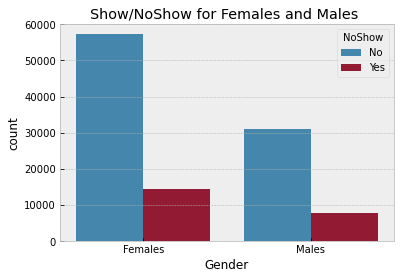

In [42]:
ax=sns.countplot(x=df.Gender,hue=df.NoShow , data=df)
ax.set_title("Show/NoShow for Females and Males ")
x_ticks_labels=['Females','Males']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#from the graph we can say Both genders have same commitment to medical schedules.

#Is the duration between registeration and appointment affect the ability to show up ?

In [43]:
df["duration"]=(df["AppointmentDay"].dt.date)-(df["ScheduledDay"].dt.date)

In [44]:
df["duration"] = df["duration"].dt.days

In [45]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,duration
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,1,1,0,0,0,No,0


In [47]:
df.groupby("NoShow").mean()["duration"]

NoShow
No      8.754759
Yes    15.831489
Name: duration, dtype: float64

Patients Who didnt show up have an average of 15 days between registeration day and their appointments.
Patients Who show up have an average of 8 days between registeration day and their appointments.

As Duration increases, the ability of patients to show up on their appointments decreases.

does age affect?

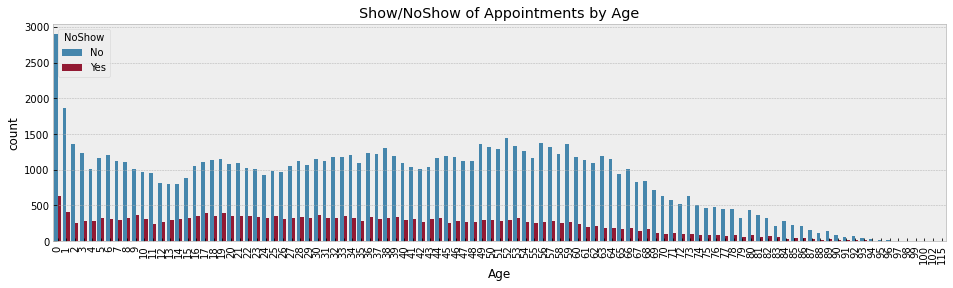

In [48]:
plt.figure(figsize=(16,4))
plt.xticks(rotation =90)
ax=sns.countplot(x=df.Age , hue = df.NoShow)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

from age 49-60 are more likely to go to their appointment 

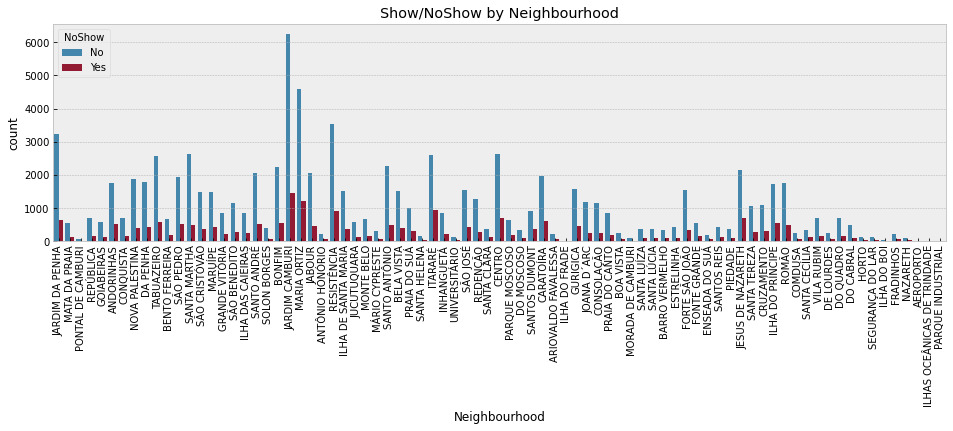

In [49]:
plt.figure(figsize=(16,4))
plt.xticks(rotation =90)
ax=sns.countplot(x=df.Neighbourhood , hue = df.NoShow)
ax.set_title("Show/NoShow by Neighbourhood")
plt.show()

In [17]:
df['Hipertension'].value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

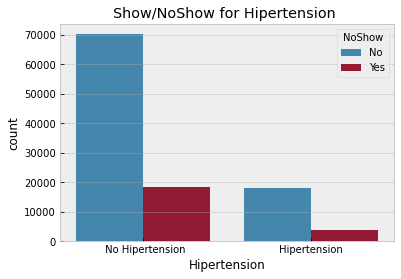

In [18]:
ax=sns.countplot(x=df.Hipertension,hue=df.NoShow , data=df)
ax.set_title("Show/NoShow for Hipertension ")
x_ticks_labels=[' No Hipertension','Hipertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [19]:
df['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

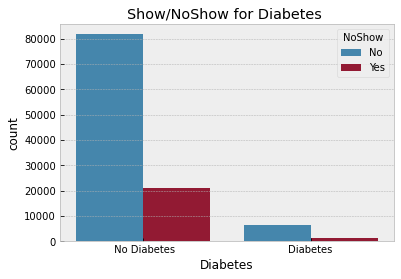

In [20]:
ax=sns.countplot(x=df.Diabetes,hue=df.NoShow , data=df)
ax.set_title("Show/NoShow for Diabetes ")
x_ticks_labels=[' No Diabetes','Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [21]:
df['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

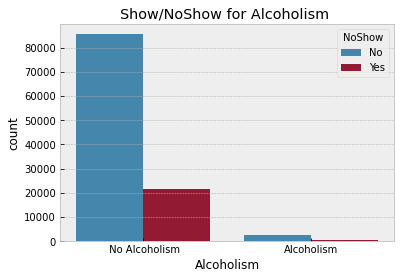

In [22]:
ax=sns.countplot(x=df.Alcoholism,hue=df.NoShow , data=df)
ax.set_title("Show/NoShow for Alcoholism ")
x_ticks_labels=[' No Alcoholism','Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [23]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

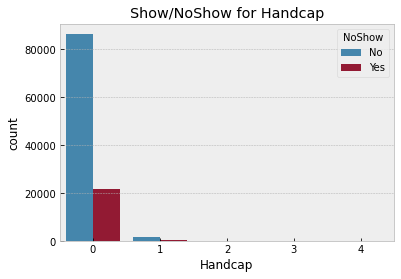

In [24]:
ax=sns.countplot(x=df.Handcap,hue=df.NoShow , data=df)
ax.set_title("Show/NoShow for Handcap")
plt.show()

In [25]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

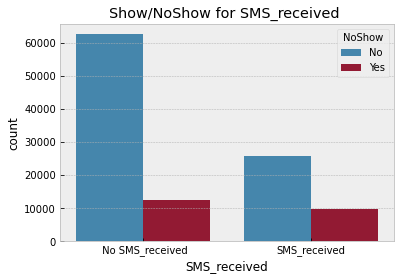

In [26]:
ax=sns.countplot(x=df.SMS_received,hue=df.NoShow , data=df)
ax.set_title("Show/NoShow for SMS_received ")
x_ticks_labels=[' No SMS_received','SMS_received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

-LabelEncoder:

In [27]:
lebel1 = LabelEncoder()
df['Gender']=lebel1.fit_transform(df['Gender'])

In [28]:
df['Neighbourhood']=lebel1.fit_transform(df['Neighbourhood'])

In [29]:
df['NoShow']=lebel1.fit_transform(df['NoShow'])

In [30]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


# Conclusion
### Percentage of patients who show up on their appointments represents 79.8%
### Percentage of patients who Don't show up on their appointments represents 20.2%
### Both genders have same commitment to medical schedules.
### Patients Who didn't show up have an average of 15 days between registeration day and their appointments.
### Patients Who show up have an average of 8 days between registeration day and their appointments.
### As Duration increases, the ability of patients to show up on their appointments decreases.
### Older patients are more commited to their appointment  schedules than younger ones.

In [ ]:
####